In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from random import *
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve

In [ ]:
%cd drive/MyDrive/Project271B

/content/drive/MyDrive/Project271B


In [13]:
from scipy import stats

In [16]:
def sort_tuple(tup):
    tup.sort(key = lambda x: x[1])
    return tup

In [15]:
def get_sorted_features(feat_df,group,y_var):

  eve0 = feat_df[feat_df[y_var]==0]
  eve1 = feat_df[feat_df[y_var]==1]
  ks_tup_list = []
  for col in feat_df.columns:
    x = eve0[col]
    y = eve1[col]
    ks_tup_list.append((col,stats.ks_2samp(x, y)[1]))
  ks_sorted = sort_tuple(ks_tup_list)
  print(ks_sorted)
  best_feat_list = list(list(zip(*ks_sorted))[0])
  #print(best_feat_list)
  best_feat_list.remove(y_var)
  return best_feat_list

In [ ]:
raw_df = pd.read_csv('dropped_df.csv')
raw_df.head()
raw_df = raw_df.loc[:, ~raw_df.columns.str.contains('^Unnamed')]

In [ ]:
df = raw_df

In [17]:
get_sorted_features(df,'group','TenYearCHD')

[('TenYearCHD', 0.0), ('age', 7.735512451612776e-37), ('sysBP', 2.2958021968752645e-26), ('prevalentHyp', 9.294739626313484e-24), ('diaBP', 3.7953259154722335e-15), ('male', 1.419860377797069e-07), ('education', 1.7489963108708632e-06), ('BMI', 3.622796482511541e-05), ('totChol', 6.897321454628343e-05), ('cigsPerDay', 0.00461902366520637), ('heartRate', 0.1714857505637711), ('BPMeds', 0.308600179843299), ('diabetes', 0.40105407232315954), ('currentSmoker', 0.6938532901535462), ('prevalentStroke', 0.99999999994528)]


['age',
 'sysBP',
 'prevalentHyp',
 'diaBP',
 'male',
 'education',
 'BMI',
 'totChol',
 'cigsPerDay',
 'heartRate',
 'BPMeds',
 'diabetes',
 'currentSmoker',
 'prevalentStroke']

In [ ]:
X=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=42)

In [18]:
['age',
 'sysBP',
 'prevalentHyp',
 'diaBP',
 'male',
 'education',
 'BMI',
 'totChol',
 'cigsPerDay']

['age',
 'sysBP',
 'prevalentHyp',
 'diaBP',
 'male',
 'education',
 'BMI',
 'totChol',
 'cigsPerDay']

In [ ]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
LDA_pred=LDA.predict(X_test)

True Positive 13
True Negative 487
False Positive 4
False Negative 97


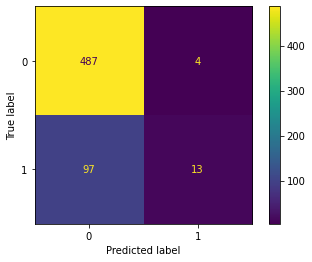

In [ ]:
tn, fp, fn, tp = confusion_matrix(list(y_test), list(LDA_pred), labels=[0, 1]).ravel()
 
print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)
 
ConfusionMatrixDisplay.from_predictions(y_test, LDA_pred)
plt.show()

In [ ]:
auc = metrics.roc_auc_score(y_test, LDA_pred)
print(auc)

0.5550175893353083
